In [1]:
# Importing the libraries 
import warnings 
import itertools
'''import itertools: This imports the Python itertools module, which provides various functions for 
working with iterators and iterable objects. In this code, itertools.product is used to generate 
combinations of parameters for the SARIMA model.'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''import matplotlib.pyplot as plt: This imports the pyplot module from the Matplotlib library 
and aliases it as plt. Matplotlib is a popular library for creating visualizations in Python.'''

warnings.filterwarnings("ignore")
'''warnings.filterwarnings("ignore"): This line sets the warning filter to ignore all warning messages. 
It prevents warning messages from being printed during the program's execution.'''

plt.style.use('fivethirtyeight')
'''plt.style.use('fivethirtyeight'): This line sets the style of the Matplotlib plots to use the "fivethirtyeight" 
style, which mimics the visual style of the FiveThirtyEight website.'''

import statsmodels.api as sm
'''import statsmodels.api as sm: This imports the api module from the Statsmodels library and aliases it as sm. 
Statsmodels is a library for statistical modeling and hypothesis testing in Python.'''

import matplotlib 

matplotlib.rcParams['axes.labelsize'] = 14
'''matplotlib.rcParams['axes.labelsize'] = 14: This line sets the default font size for axis labels in 
Matplotlib plots to 14.'''

matplotlib.rcParams['xtick.labelsize'] = 12
'''This line sets the default font size for x-axis tick labels in Matplotlib plots to 12.'''

matplotlib.rcParams['ytick.labelsize'] = 12
'''matplotlib.rcParams['ytick.labelsize'] = 12: This line sets the default font size for y-axis tick 
labels in Matplotlib plots to 12.'''


matplotlib.rcParams['text.color'] = 'k'
# '''This line sets the default color for text (such as labels and annotations) in Matplotlib plots to black.'''

# Time series analysis and forecasting for furniture sales


In [2]:
# reading the dataset 
df = pd.read_excel('Superstore.xls')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
furniture = df.loc[df['Category'] == 'Furniture']
# df['Category']: This extracts the 'Category' column from the DataFrame df.
# df['Category'] == 'Furniture': This creates a boolean Series with True for rows where the 'Category' 
# column is equal to 'Furniture' and False for rows where it is not.

# df.loc[...]: This is a pandas DataFrame method that is used to select rows based on a certain condition.
# It takes a boolean Series as an argument and returns only the rows where the condition is True.

# Minimum Order date

In [5]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

# Maximum Order Date 

In [6]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [7]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [8]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
# performs a data aggregation operation on the DataFrame furniture to group the data by the 'Order Date' column, 
# calculate the sum of the 'Sales' for each group, and then reset the index of the resulting DataFrame.


In [10]:
furniture.head()


,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [11]:
# Indexing with time series data 
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [13]:
y = furniture['Sales'].resample('MS').mean()

# the code takes the 'Sales' data from the furniture DataFrame, resamples it to a monthly 
# frequency (starting at the beginning of each month), and then calculates the mean sales for each month. 
# The result is stored in a new Series called y, which represents the time series data of mean monthly sales. 
# This can be useful for analyzing and visualizing the average sales pattern over time, especially 
# when dealing with time series data with irregular timestamps.

In [14]:
y['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

## Visualizing the sales data

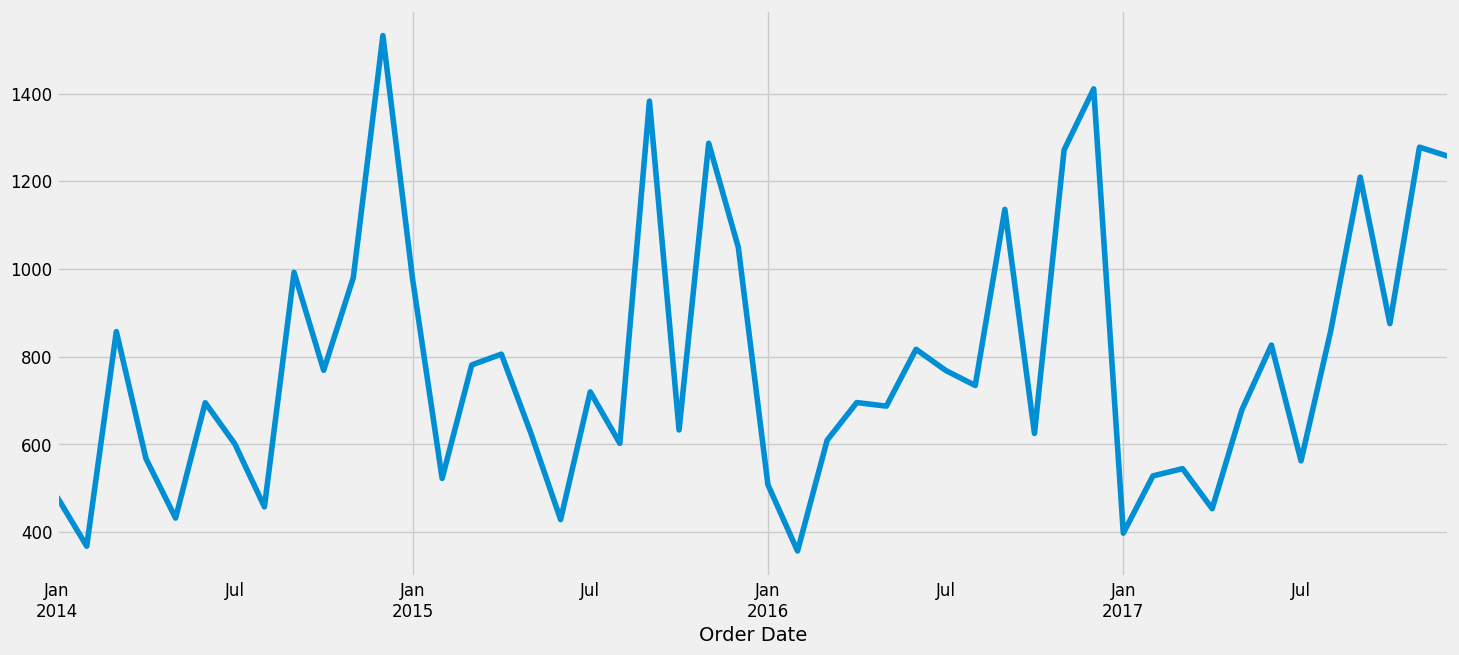

In [15]:
y.plot(figsize=(16, 7))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always a strong upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

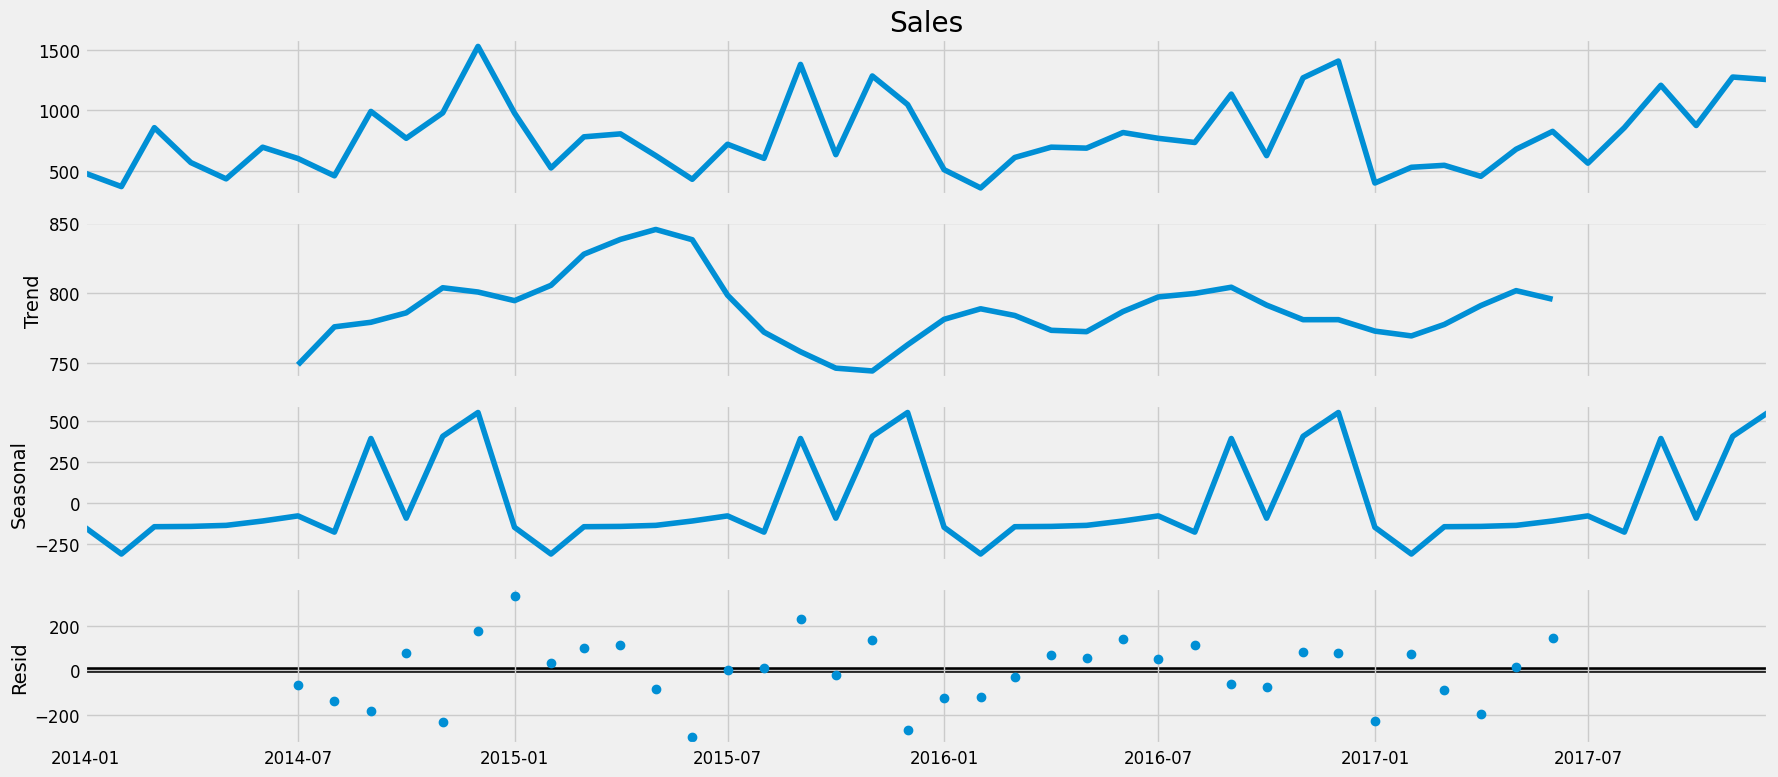

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()